**NAMA : IBNU RAIHAN**

**NIM : 2304220044**

**PRODI : STATISTIKA DAN SAINS DATA**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error

In [3]:
data = pd.read_csv('D:/Kuliah/Semester 4/penambangan data dan analisis bisnis/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**SOAL NOMOR 1 (EKSPLORASI AWAL)**

a. Berapa jumlah total penumpang dalam data?

In [5]:
total_penumpang = data.shape[0]
print(f"Jumlah total penumpang: {total_penumpang}")

Jumlah total penumpang: 891


b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik?

          Status  Jumlah
0  Tidak Selamat     549
1        Selamat     342


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_16892\3123840972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_table['Status'], y=survival_table['Jumlah'], palette='pastel')


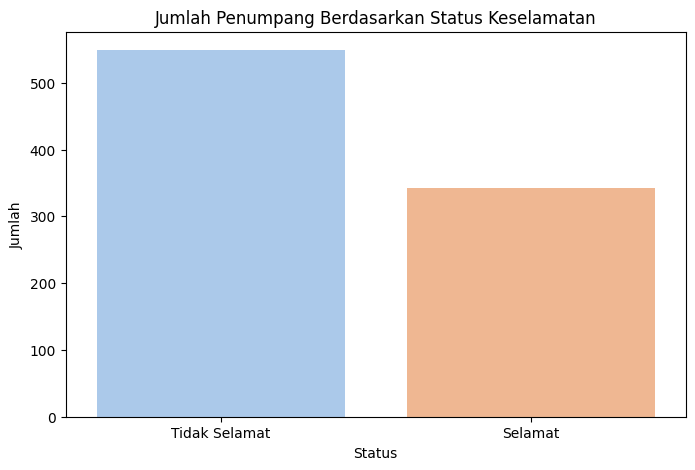

In [6]:
#Membentuk Tabel DataFrame
survival_counts = data['Survived'].value_counts()
survival_table = pd.DataFrame({
    'Status': ['Tidak Selamat', 'Selamat'],
    'Jumlah': [survival_counts[0], survival_counts[1]]
})
print(survival_table)

# Visualisasi hasil menggunakan grafik
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_table['Status'], y=survival_table['Jumlah'], palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Status Keselamatan')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua

In [7]:
rata_rata_umur = data['Age'].mean()

# Mendapatkan nama penumpang termuda
nama_termuda = data.loc[data['Age'].idxmin(), 'Name']

# Mendapatkan nama penumpang tertua
nama_tertua = data.loc[data['Age'].idxmax(), 'Name']

print(f"Nama penumpang termuda: {nama_termuda}")
print(f"Nama penumpang tertua: {nama_tertua}")

Nama penumpang termuda: Thomas, Master. Assad Alexander
Nama penumpang tertua: Barkworth, Mr. Algernon Henry Wilson


d. Berapakah jumlah penumpang berdasarkan jenis kelamin? Siapa yang paling banyak? Visualisasikan

  Jenis Kelamin  Jumlah
0          male     577
1        female     314
Jenis kelamin yang paling banyak: male


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_16892\1137154979.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_table['Jenis Kelamin'], y=gender_table['Jumlah'], palette='coolwarm')


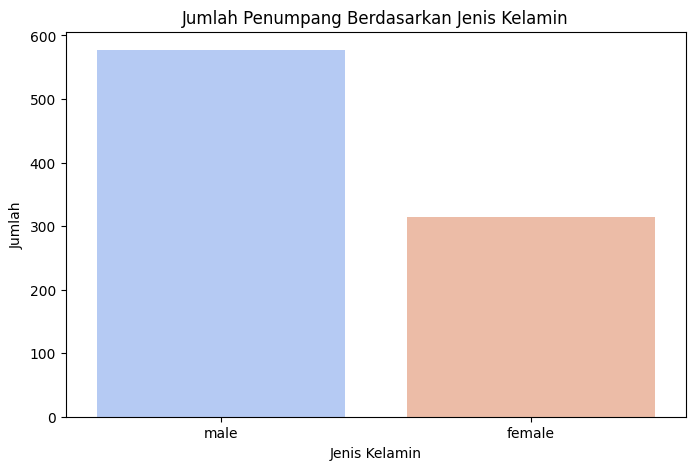

In [8]:
# Menghitung jumlah penumpang berdasarkan jenis kelamin
gender_counts = data['Sex'].value_counts()

# Menampilkan hasil dalam bentuk tabel
gender_table = pd.DataFrame({
    'Jenis Kelamin': gender_counts.index,
    'Jumlah': gender_counts.values
})
print(gender_table)

# Menentukan jenis kelamin yang paling banyak
gender_terbanyak = gender_counts.idxmax()
print(f"Jenis kelamin yang paling banyak: {gender_terbanyak}")

# Visualisasi hasil menggunakan grafik
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_table['Jenis Kelamin'], y=gender_table['Jumlah'], palette='coolwarm')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang beada di kelasa 1? Visualisasikan

   Kelas  Jumlah
0      3     491
1      1     216
2      2     184
Persentase penumpang di kelas 1: 24.24%


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_16892\2640326099.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_table['Kelas'], y=pclass_table['Jumlah'], palette='viridis')


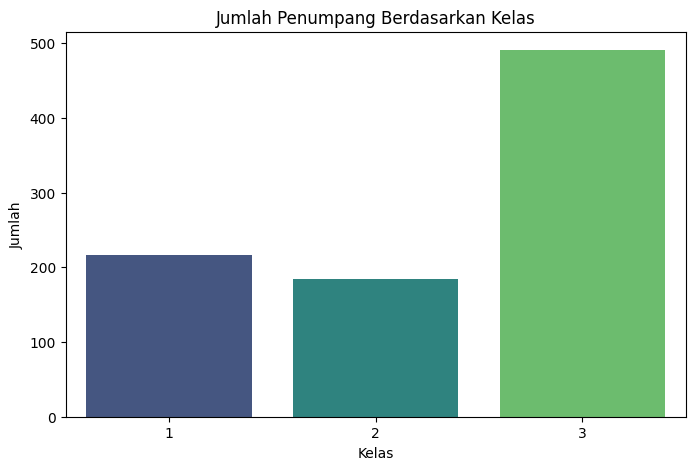

In [9]:
# Menghitung jumlah penumpang berdasarkan kelas (Pclass)
pclass_counts = data['Pclass'].value_counts()

# Menampilkan hasil dalam bentuk tabel
pclass_table = pd.DataFrame({
    'Kelas': pclass_counts.index,
    'Jumlah': pclass_counts.values
})
print(pclass_table)

# Menghitung persentase penumpang di kelas 1
total_penumpang = data.shape[0]
persentase_kelas_1 = (pclass_counts[1] / total_penumpang) * 100
print(f"Persentase penumpang di kelas 1: {persentase_kelas_1:.2f}%")

# Visualisasi hasil menggunakan grafik
plt.figure(figsize=(8, 5))
sns.barplot(x=pclass_table['Kelas'], y=pclass_table['Jumlah'], palette='viridis')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

**SOAL NOMOR 2 (PREPROCESSING)**

a. Apakah terdapat missing value pada data tersebut?

In [10]:
np.sum(data.isnull())

d:\python\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Jumlah missing value di setiap kolom :
- Missing value di kolom Age (Umur) adalah 177
- Missing value di kolom Cabin adalah 687
- Missing value di kolom Embarked adalah 2

b. Jika ya, apa yang anda lakukan?

Pada tahap ini yang saya lakukan untuk masing-masing variabel, yakni :
- Pada kolom Age, saya akan menggunakan metode imputasi mean
- Pada kolom Kabin, saya akan membiarkan nilai missing value/drop kolom Kabin karena terlalu banyak missing value
- Pada kolom Embarked, saya akan menggunakan metode imputasi modus (Mencari Nilai Yang Sering Muncul) dan melakukan encoder untuk kategoriknya.
- Pada kolom Sex, saya akan melakukan encoder.

In [11]:
embarked_counts = data['Embarked'].value_counts()
print(embarked_counts)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [12]:
# Mengisi nilai kosong pada kolom 'Age' dengan rata-rata umur (jika ada nilai kosong)
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Mengisi nilai kosong pada kolom 'Embarked' dengan nilai 'S' (jika ada nilai kosong)
data['Embarked'] = data['Embarked'].fillna('S')

In [13]:
np.sum(data.isnull())

d:\python\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# Label Encoding untuk kolom 'Sex'
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Label Encoding untuk kolom 'Embarked'
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

print(data[['Sex', 'Embarked']].head())

   Sex  Embarked
0    0         2
1    1         0
2    1         2
3    1         2
4    0         2


Pada tahap ini, Saya melakukan encoder pada kolom Sex dan Embarked dengan ketentuan :
- Kolom Sex :

0 = Male, 1 = Female.

- Kolom Embarked :

0 = C, 1 = Q, 2 = S.

c. Apakah terdapat data outlier pada data tersebut? Jelaskan apa itu outlier!

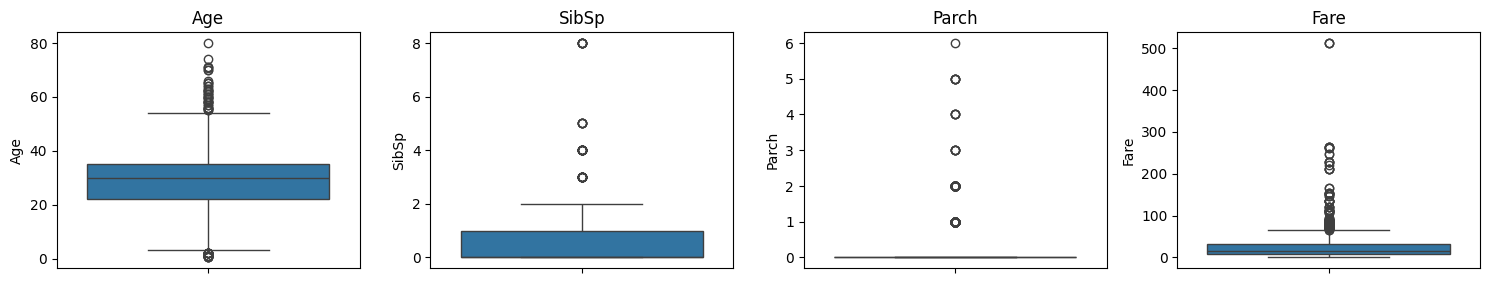

In [15]:
# Visualisasi Boxplot
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Outlier** adalah data yang memiliki nilai yang sangat berbeda atau jauh dari sebagian besar data lainnya dalam dataset. Outlier dapat memengaruhi analisis statistik dan model machine learning, sehingga penting untuk mendeteksinya.
Pada dataset ini, terdapat beberapa kolom numerik yang dapat memiliki outlier, seperti 'Age', 'SibSp', 'Parch', dan 'Fare'.

d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

Pada kolom 'Age', 'SibSp', 'Parch', dan 'Fare' terdapat outlier, Saya menggunakan metode capping untuk mengatasinya karena ingin mempertahankan data. Capping adalah teknik untuk membatasi nilai outlier ke dalam rentang tertentu berdasarkan Interquartile Range (IQR). 

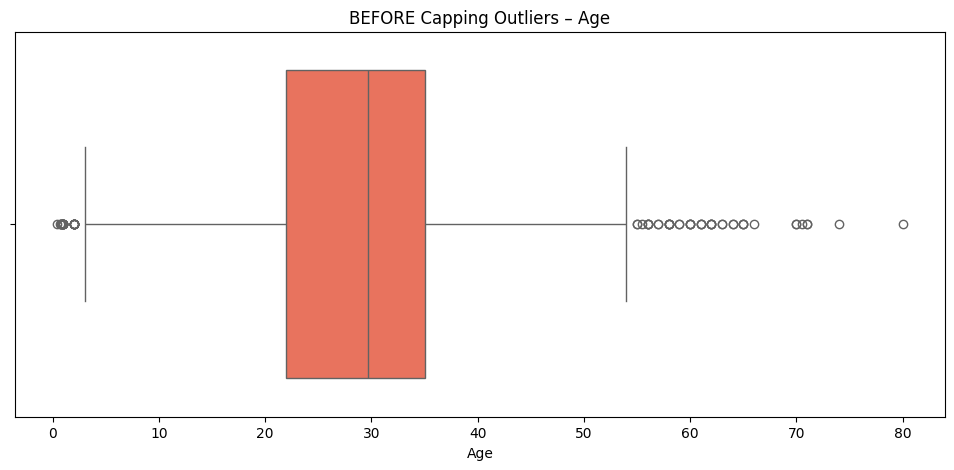

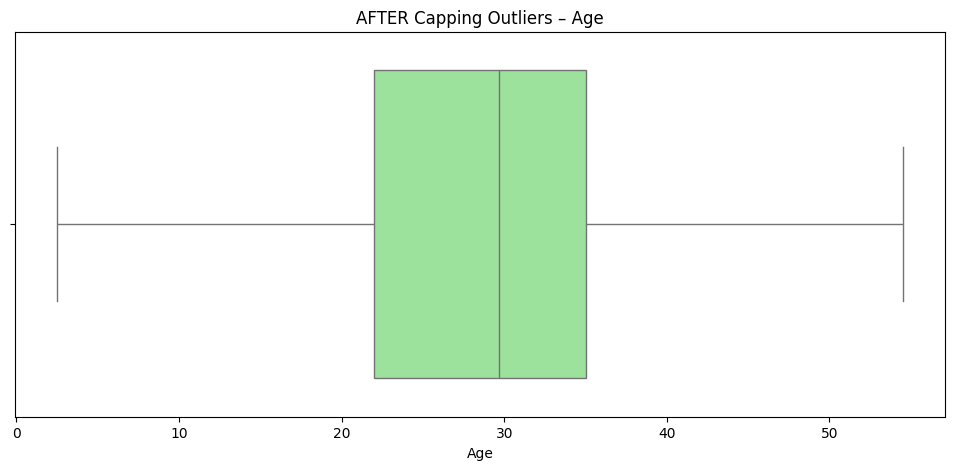

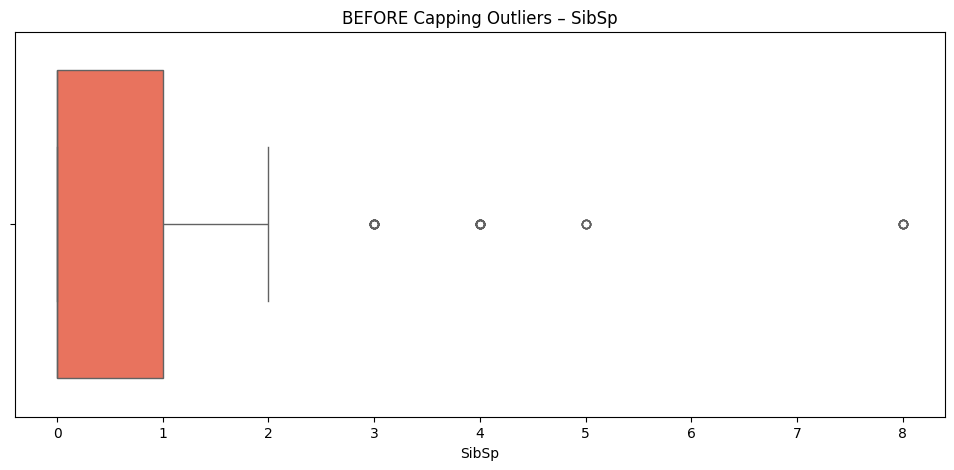

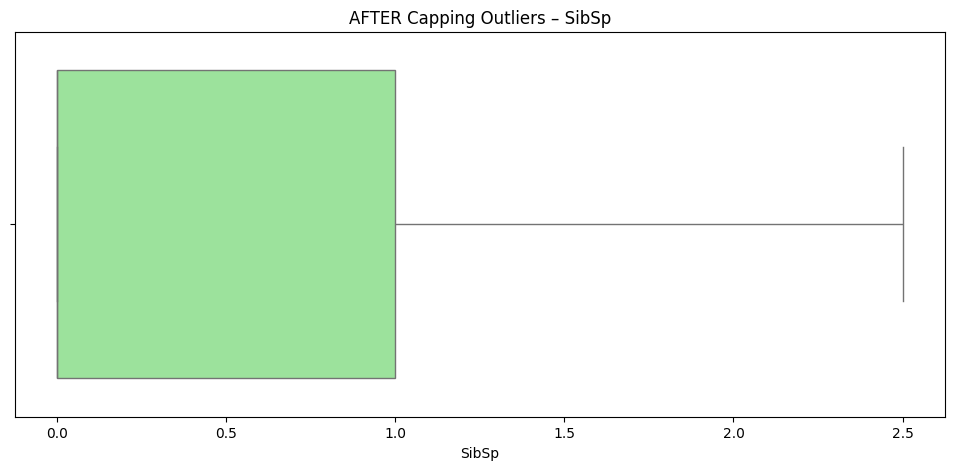

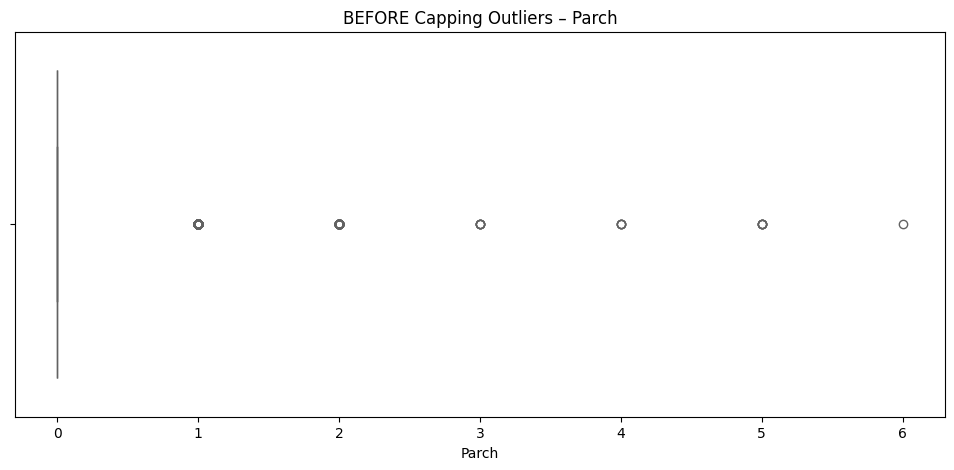

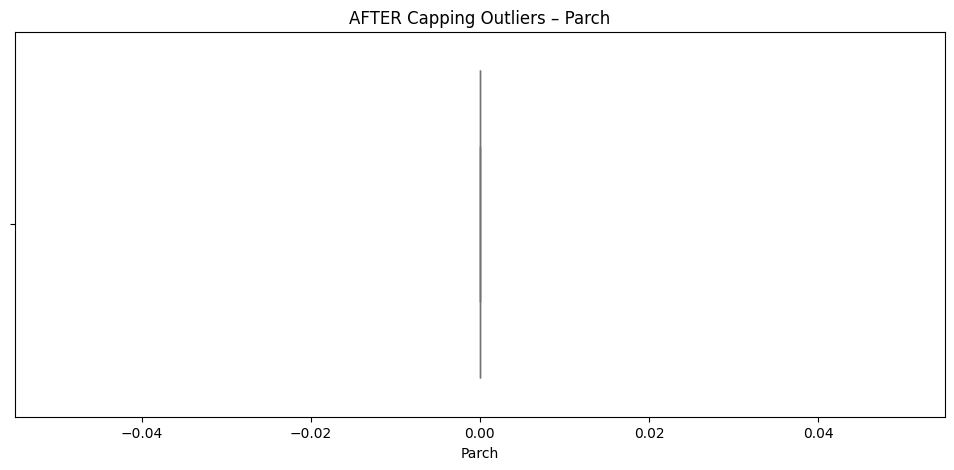

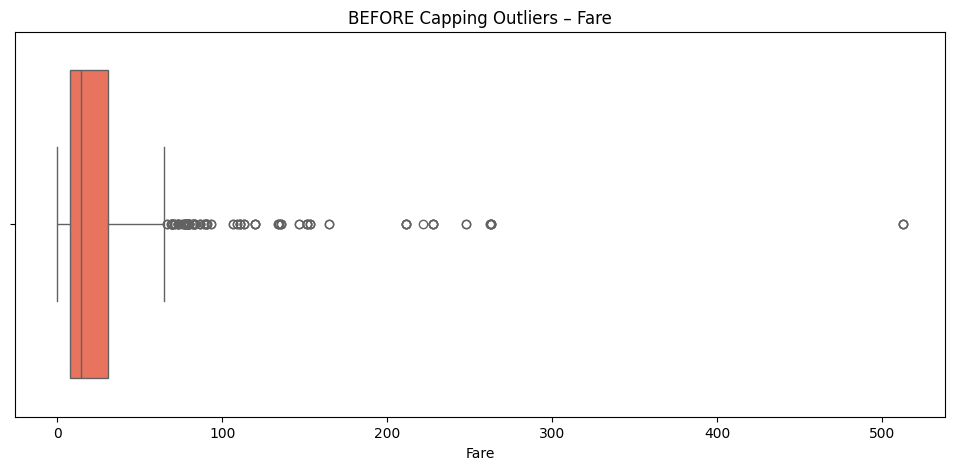

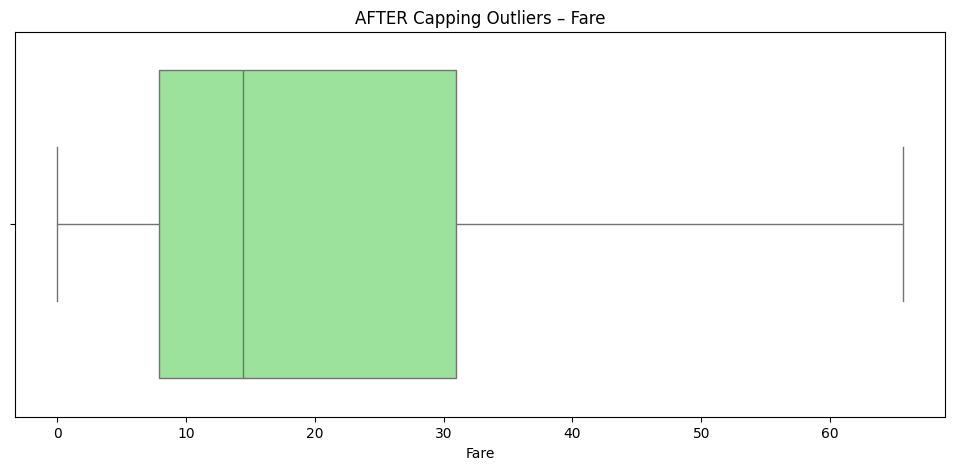

In [ ]:
# Fungsi capping berdasarkan IQR
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] < lower_limit, lower_limit,
                    np.where(data[column] > upper_limit, upper_limit, data[column]))
    return data

capped_data = data.copy()

# Loop semua kolom numerik
for col in numerical_cols:
    # Membuat boxplot sebelum capping
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=capped_data[col], color='tomato')
    plt.title(f'BEFORE Capping Outliers – {col}')
    plt.show()

    capped_data = cap_outliers_iqr(capped_data, col)

    # Membuat boxplot setelah capping
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=capped_data[col], color='lightgreen')
    plt.title(f'AFTER Capping Outliers – {col}')
    plt.show()

e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut

Saya melakukan scalling karena saya akan menggunakan model KNN, Logistic Regression, dan Neural Network (Multi Layer Perceptron). dan saya menggunakan transformasi untuk kolom Fare untuk mengurangi skewness.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [17]:
# Log transformasi untuk kolom Fare
data['Fare'] = np.log1p(data['Fare'])  # Menggunakan log(1 + x) untuk menghindari log(0)

print(data['Fare'].head())

0    2.110213
1    4.280593
2    2.188856
3    3.990834
4    2.202765
Name: Fare, dtype: float64


**SOAL NOMOR 3 (MODELLING)**

a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.

Data training digunakan untuk melatih model agar bisa mengenali pola dalam data. Data testing digunakan untuk mengukur performa model pada data yang belum pernah dilihat sebelumnya. Pembagian data training dan testing sangat penting agar kita bisa menilai seberapa baik model bekerja di luar data latihannya, yang mencerminkan performa di dunia nyata.

b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

80% untuk training dan 20% untuk testing. Proporsi 80:20 adalah standar yang sering digunakan karena memberikan data latih yang cukup banyak, sambil tetap menyediakan data uji yang cukup representatif untuk mengevaluasi model.

c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya.

In [23]:
# Pisahkan fitur dan target
X = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])  # fitur
y = data['Survived']  # target klasifikasi

1. K Nearest Neighbors

Dalam KNN, data baru akan diprediksi berdasarkan kedekatannya dengan titik data yang ada (neighbor). KNN akan menghitung jarak antara data baru dan setiap data dalam dataset menggunakan metrik jarak (seperti Euclidean, Manhattan, dll). Kemudian, data baru akan dikategorikan ke dalam kelas yang paling banyak muncul di "K" tetangga terdekat.

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model KNN untuk klasifikasi
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluasi model
print("Akurasi Klasifikasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi Klasifikasi: 0.8268156424581006
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



2. Neural Network (Multi Layer Perceptron)

Neural Network adalah algoritma pembelajaran mesin yang terinspirasi oleh cara kerja otak manusia, dengan struktur yang terdiri dari lapisan input, lapisan tersembunyi (hidden layers), dan lapisan output. Setiap neuron dihubungkan ke neuron lain dengan bobot yang dapat dipelajari. Input melalui neuron pertama akan diteruskan melalui jaringan, dan setiap bobot akan mempengaruhi hasil akhir. Output dihitung dengan melakukan operasi matematika (biasanya perkalian matriks) pada input dan bobot, kemudian melewati fungsi aktivasi (seperti ReLU, sigmoid, atau tanh) untuk memperkenalkan non-linearitas.Proses pelatihan menggunakan metode seperti backpropagation untuk memperbarui bobot berdasarkan kesalahan prediksi.

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model MLP untuk Klasifikasi
mlp = MLPClassifier(hidden_layer_sizes=(6, 4), max_iter=1000, alpha=0.01, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Akurasi Klasifikasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred)) 



Akurasi Klasifikasi: 0.8379888268156425
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



3. Logistic Regression

Logistic Regression digunakan untuk klasifikasi biner (dua kelas). Model ini mengestimasi probabilitas kelas dengan menggunakan fungsi logistik (sigmoid). Fungsi logistik memetakan output dari model linear (hasil perkalian antara input dan bobot) ke dalam rentang antara 0 dan 1, yang kemudian dapat diinterpretasikan sebagai probabilitas. Model ini mencoba menemukan parameter (bobot) yang meminimalkan fungsi biaya (seperti log-loss) menggunakan teknik optimasi (misalnya, gradient descent).

In [ ]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Model Logistic Regression
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

#Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Klasifikasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi Klasifikasi: 0.8324022346368715
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.76      0.76      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?

- Akurasi KNN : 82.6%
- Akurasi MLP : 83.7%
- AKurasi LR : 83.2%

Metrik-metrik evaluasi :
1. Akurasi (Accuracy): Persentase prediksi yang benar dari total data.
2. Precision: Proporsi prediksi positif yang benar dari semua prediksi positif.
3. Recall (Sensitivity atau True Positive Rate): Proporsi data positif yang benar-benar terdeteksi sebagai positif.
4. F1-Score: Rata-rata harmonis antara Precision dan Recall.

e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira kira apa yang memnyebabkan metode tersebut dapat memprediksi dataset anda dengan baik.

MLP sedikit lebih unggul karena kemampuannya untuk menangani pola yang lebih kompleks dan non-linear dalam data. Meskipun dataset Titanic relatif kecil, MLP tetap bisa menunjukkan kinerja yang lebih baik dengan optimasi yang lebih baik pada bobot dan hubungan antar fitur.  MLP dapat menangani hubungan yang lebih kompleks antara fitur dan target. Meskipun dataset Titanic relatif kecil, MLP masih dapat mempelajari representasi yang lebih kompleks dari data, yang mungkin menjelaskan sedikit peningkatan dalam akurasi dibandingkan KNN dan LR. Proses pelatihan MLP menggunakan backpropagation dan optimasi yang lebih canggih memungkinkan model untuk menyesuaikan bobot secara efisien, menghasilkan sedikit perbaikan dibandingkan KNN dan LR.

**SOAL NOMOR 4 (EVALUASI)**

a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang selamat?

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model MLP untuk Klasifikasi
mlp = MLPClassifier(hidden_layer_sizes=(6, 4), max_iter=1000, alpha=0.01, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Akurasi Klasifikasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred)) 

Akurasi Klasifikasi: 0.8379888268156425
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



Berdasarkan Classification Report MLP, 
- Precision untuk penumpang yang selamat : 0.86
- Recall untuk penumpang yang selamat : 0.73

b. Berapa banyak penumpang yang di prediksi selamat, dan berapa diantaranya benar-benar selamat?

In [75]:
# Jumlah yang diprediksi selamat (prediksi = 1)
jumlah_prediksi_selamat = np.sum(y_pred == 1)

# Jumlah yang benar-benar selamat di antara prediksi = 1
jumlah_benar_selamat = np.sum((y_pred == 1) & (y_test == 1))

print(f"Jumlah penumpang yang diprediksi selamat: {jumlah_prediksi_selamat}")
print(f"Jumlah di antaranya yang benar-benar selamat: {jumlah_benar_selamat}")

Jumlah penumpang yang diprediksi selamat: 63
Jumlah di antaranya yang benar-benar selamat: 54
